# NBA Player Salary

By Reimer A. Romero H.

This Octuber begin the 2022-23 NBA season. Press has released Lebrom James salary, apparently he will place like  the best paid in history. In this notebook we will extract and analyze the evolution of the NBA players salaries, from the 1991-1992 to 2021-2022 seasons.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

First, we reads the NBA_data.csv, containing information about champ teams and MVP players by year, this file was built by hand.

In [2]:
dataNBA = pd.read_csv('dataset/NBA_data.csv',index_col=0,names=['year','ChTeam','id_MVP','MVP_name','MVP_salary'])
dataNBA

,ChTeam,id_MVP,MVP_name,MVP_salary
year,,,,
1992,CHI,j/jordanmi01,Jordan M.,3325000
1993,CHI,b/barklch01,Barkley CH.,2420000
1994,HOU,o/olajuha01,Olajuwon H.,3170000
1995,HOU,r/robinda01,Robinson D.,7730000
1996,CHI,j/jordanmi01,Jordan M.,3850000
1997,CHI,m/malonka01,Malone K.,4657000
1998,CHI,j/jordanmi01,Jordan M.,33140000
1999,SAS,m/malonka01,Malone K.,6142000
2000,LAL,o/onealsh01,O'Neals Sh.,17142000


Next we move over 30 seasons thoght the csv files, the salaryNBAXXXX.csv files contains:
name_player,his_team,his_salary information on all NBA players by year (XXXX). This data was wraping from https://www.basketball-reference.com/leagues/

In [3]:
all_Players = pd.DataFrame(columns=['team','name','salary'])
all_Teams   = pd.DataFrame(columns=['team','salary'])

playersBPs = pd.DataFrame(columns=['team','name','salary'])
teamsBPs = pd.DataFrame(columns=['team','salary'])
champTeams = pd.DataFrame(columns=['team','salary'])

Years = np.uint16(np.linspace(1992,2022,31)) 
for year in Years:
    
    tablePlayers = pd.read_csv('dataset/salaryNBA' +str(year)+ '.csv',names=['team','name','salary'])
    tablePlayers.insert(0,'year',year,True)
    
    tableTeams = tablePlayers.groupby("team").salary.sum().reset_index()
    tableTeams.insert(0,'year',year,True)
    
    all_Players = pd.concat([all_Players,tablePlayers])
    all_Teams   = pd.concat([all_Teams,  tableTeams ])
                                
    # Best Paid players
    new_playerBPs = tablePlayers.loc[tablePlayers['salary']==tablePlayers['salary'].max()]
    playersBPs = pd.concat([playersBPs,new_playerBPs])
    
    # Best Paid Teams
    new_tableTeams = tableTeams.loc[tableTeams['salary']==tableTeams['salary'].max()]
    teamsBPs   = pd.concat([teamsBPs,new_tableTeams]) 
    
    new_champTeams =  tableTeams[tableTeams['team']==dataNBA['ChTeam'][year]]
    champTeams = pd.concat([champTeams,new_champTeams])
  


In [49]:
gsw=tablePlayers[tablePlayers['team']=='GSW']
gsw

,year,team,name,salary
523,2022,GSW,Stephen Curry,45780966
524,2022,GSW,Klay Thompson,37980720
525,2022,GSW,Andrew Wiggins,31579390
526,2022,GSW,Draymond Green,24026712
527,2022,GSW,James Wiseman,9166800
528,2022,GSW,Jonathan Kuminga,5466360
529,2022,GSW,Kevon Looney,5178572
530,2022,GSW,Moses Moody,3562080
531,2022,GSW,Andre Iguodala,2641691
532,2022,GSW,Otto Porter,2389641


In [50]:
print(f"Mean salary GSW es {gsw.salary.mean()/1e6: .1f} USD millions" )
print(f"Median salary GSW {gsw.salary.median()/1e6: .1f} USD millions")

Mean salary GSW es  9.4 USD millions
Median salary GSW  2.4 USD millions


# Ploting first results


## Two plot to describe the best payed player and team

In [5]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

<IPython.core.display.Javascript object>


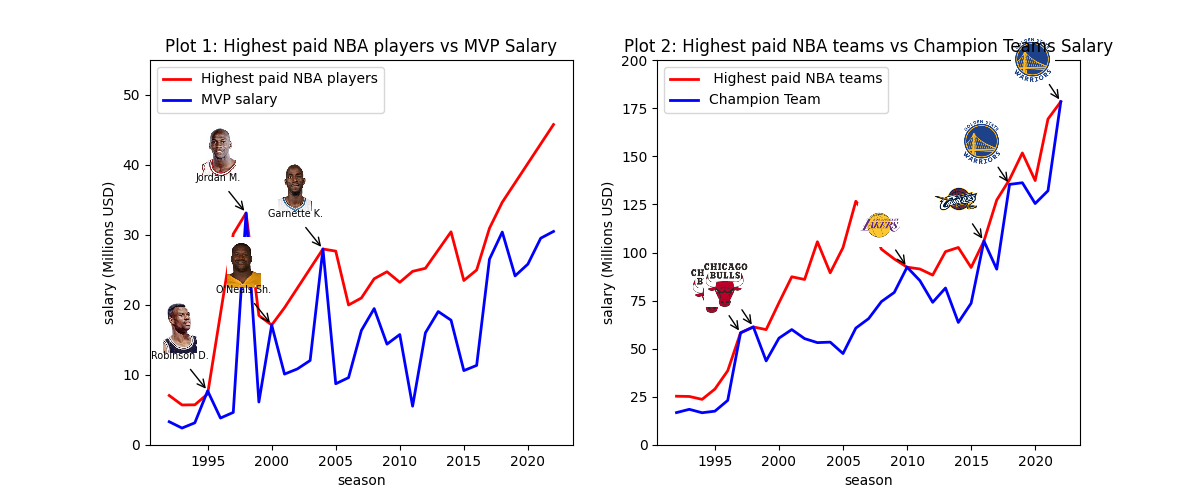

Text(0.5, 1.0, 'Plot 2: Highest paid NBA teams vs Champion Teams Salary')

In [52]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Best paid players
axes[0].plot(playersBPs['year'], playersBPs['salary']/1e6, '-r', linewidth=2, label="Highest paid NBA players")
# MVPs
axes[0].plot( dataNBA.index, dataNBA['MVP_salary']/1e6, '-b', linewidth=2, label="MVP salary")
#axes[0].plot(Years, Players['mean']/1e6, '-g', linewidth=2,label="BP")
axes[0].set_xlabel('season')
axes[0].set_ylabel('salary (Millions USD)')
axes[0].set_ylim([0,55])
axes[0].legend(fontsize='medium',loc='upper left')
axes[0].set_title('Plot 1: Highest paid NBA players vs MVP Salary')

# Best paid teams 
axes[1].plot(teamsBPs['year'], teamsBPs['salary']/1e6, '-r', linewidth=2, label=" Highest paid NBA teams")
# Champion Teams
axes[1].plot(champTeams['year'], champTeams['salary']/1e6, '-b', linewidth=2,label="Champion Team")
axes[1].set_xlabel('season')
axes[1].set_ylim([0,200])
axes[1].set_ylabel('salary (Millions USD)')
axes[1].legend(fontsize='medium',loc='upper left')
axes[1].set_title('Plot 2: Highest paid NBA teams vs Champion Teams Salary')


### Plot annotations MVP salary

In [53]:
target_years = [1995,1998,2000,2004]

for id_,y,s in zip(dataNBA['id_MVP'][target_years].tolist(), target_years, dataNBA.loc[target_years,'MVP_salary']/1e6  ):
        
        file_image = f"images/{id_[2:]}.jpg"
        img = plt.imread(file_image, format='jpg')
        imagebox = OffsetImage(img, zoom=0.200)
        imagebox.image.axes = axes[0]
        ab = AnnotationBbox(imagebox, (y,s),
                            xybox=(-20, 45),
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0, frameon=False)
        axes[0].add_artist(ab)
        
        Textbox = TextArea(f"{dataNBA.loc[y].MVP_name}",{'fontsize':'x-small'})
        ab = AnnotationBbox(Textbox, (y,s),
                            frameon=False,        
                            xybox=(-20, 25),
                            xycoords='data',
                            boxcoords="offset points",
                            arrowprops=dict(arrowstyle="->"))
        axes[0].add_artist(ab)

### Plot annotations Champ teams salary

In [54]:
target_years = [1997,1998,2010,2016,2018,2022]
for y in target_years:
        team = champTeams.loc[champTeams['year']==y]['team'].tolist()[0]
        s = champTeams.loc[champTeams['year']==y]['salary']/1e6 
        
        file_image = f"images/{team}.png"
        img = plt.imread(file_image, format='png')
        imagebox = OffsetImage(img, zoom=0.250)
        imagebox.image.axes = axes[1]
        ab = AnnotationBbox(imagebox, (y,s),
                            xybox=(-20, 30),
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0, frameon=False,
                            arrowprops=dict(arrowstyle="->")
                           )
        axes[1].add_artist(ab)
        

# Second Results: median salary

We can get the statistical summary by year  on salary issue. Next results are two box plot: 1) players salary and 2) teams salary.

<IPython.core.display.Javascript object>


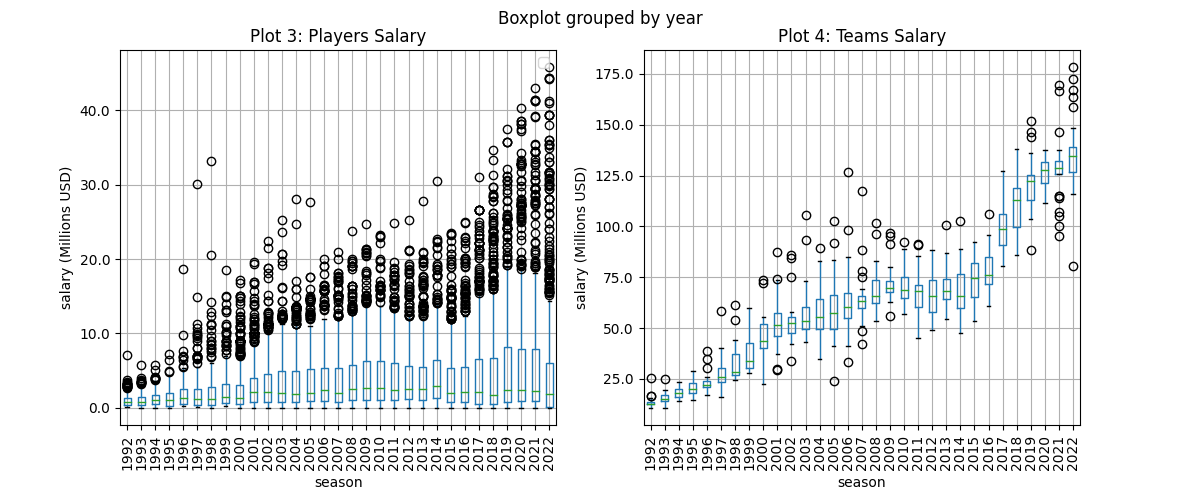

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [51]:
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
fig2, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# box plot  players results
all_Players.boxplot('salary',by='year',rot=90,ax=ax1)
ax1.set_title('Plot 3: Players Salary')
ax1.legend(fontsize='medium',loc='upper right')


# box plot teams results
all_Teams.boxplot('salary',by='year',rot=90,ax=ax2)
ax2.set_title('Plot 4: Teams Salary')


# adding horizontal grid lines
for ax in (ax1,ax2):
    ax.set_xlabel('season')
    ax.set_ylabel('salary (Millions USD)')
    ax.yaxis.set_major_formatter(lambda y, pos: f"{float(y/1e6)}") 
    ax.xaxis.set_major_formatter(lambda x, pos: f"{x + 1991}")
    


Mean salary GSW es  9.4 USD millions
Median salary GSW  2.4 USD millions


# Additional results: How many best paid players there are?

Question can be answered by taking the statistical summary giving by each box. The best payed salary are the outliers, or o-marks in the box plot. Remember, values outliers are highest that Q_75 + 1.5IQ, where Q_75 is quantil 75% and IQ is Inter Quantil value (Q_75 - Q_25). To know details about this, you can  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm or 
http://www.physics.csbsju.edu/stats/box2.html .

In [30]:
nuPBP = pd.DataFrame(columns=['salary outliers','No. PBP', '% PBP'])
for y in Years:
    pp = all_Players['salary'][all_Players['year']==y]
    Q1 = pp.quantile(.25)
    Q3 = pp.quantile(.75)
    IQ = Q3-Q1
    nuPBP.loc[y,'salary outliers'] = Q3 + 1.5*IQ                                   # upper bond (upb)
    nuPBP.loc[y,'No. PBP'] = pp[pp>Q3+1.5*IQ].count()                              # salary's players > upb 
    nuPBP.loc[y,'% PBP'] = 100 *( pp[pp>Q3+1.5*IQ].count()/ pp.count() ).round(3)  # %
   

In [31]:
nuPBP.round(2)

,salary outliers,No. PBP,% PBP
1992,2659375.0,17,4.4
1993,3180000.0,11,2.7
1994,3651000.0,9,2.3
1995,4700000.0,4,0.9
1996,5443000.0,9,2.3
1997,5741875.0,21,5.0
1998,6506965.0,20,4.4
1999,7165907.5,26,5.9
2000,7003500.0,51,9.5
2001,8756695.0,46,9.8


In [32]:
nuPBP = pd.DataFrame(columns=['salary outliers','No. PBP', '% PBP'])
for y in [1992,2022]:
    pp = all_Players['salary'][all_Players['year']==y]
    Q1 = pp.quantile(.25)
    Q3 = pp.quantile(.75)
    IQ = Q3-Q1
    nuPBP.loc[y,'salary outliers'] = Q3 + 1.5*IQ                                   # upper bond (upb)
    nuPBP.loc[y,'No. PBP'] = pp[pp>Q3+1.5*IQ].count()                              # salary's players > upb 
    nuPBP.loc[y,'% PBP'] = 100 *( pp[pp>Q3+1.5*IQ].count()/ pp.count() ).round(3)  # %
   

In [34]:
nuPBP.round(2)

,salary outliers,No. PBP,% PBP
1992,2659375.0,17,4.4
2022,14799961.5,88,11.8


# END

### Plus

In [ ]:
gsw = tablePlayers[tablePlayers['team']=='GSW']
n_gsw = tablePlayers[tablePlayers['team']!='GSW']
a=pd.concat([gsw,n_gsw])
fig3, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# hist
#gsw.hist('salary',bins=19,ax=ax1)

# boxplot
gsw.boxplot('salary',rot=0,ax=ax1,vert=False)
#tablePlayers.boxplot('salary',rot=90,ax=ax)
n_gsw.boxplot('salary',rot=0,ax=ax2,vert=False)
ax1.xaxis.set_major_formatter(lambda x, pos: f"{float(x/1e6)}")

#ax.set_title('Plot 3: Players Salary')
#ax1.legend(fontsize='medium',loc='upper right')
ax2.xaxis.set_major_formatter(lambda x, pos: f"{float(x/1e6)}")
ax2.set_xlabel('salary (Millions USD)')